## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [11]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import numpy as np
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

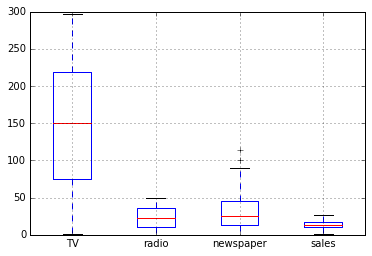

In [2]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

/Users/melindasong/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1252c76a0>,
      dtype=object)

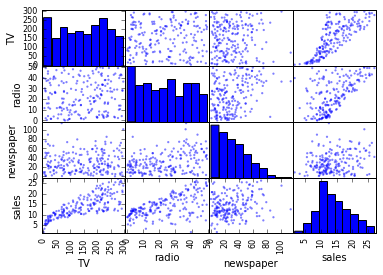

In [3]:
from pandas.tools.plotting import scatter_matrix
pd.scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer

In [46]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


The highest correlation between the variables is radio and newspaper, which is 0.35 and is not really considered high. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [49]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [48]:
y = df[['sales']]

b) Set X to be just the features described above in df

In [191]:
X = df[['TV','radio', 'newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [160]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

d) Train model on training data, and make predictions on testing data

In [163]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
y_hat = lm.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [54]:
print('Variance score: %.2f' % lm.score(X_test, y_test))

Variance score: 0.86


$R^2$ of 0.86 is considered pretty good because it means that advertising dollars spent on TV, newspaper, and radio sells can explain a lot about sales figures. 

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

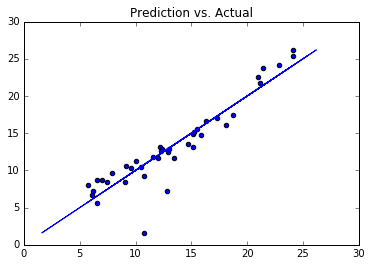

In [27]:
plt.title('Prediction vs. Actual')
plt.scatter(y_hat,y_test)
plt.plot(y_test,y_test)

Looks like a pretty good model. Actual data are in close vicinity to the regression line which means that residuals are small overall. There's only one point could be a potential outlier that linear regression predicted poorly. 

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [152]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 0.04458402  0.19649703 -0.00278146]]


Based on the coefficients, it looks like radio advertisement has the largest impact on sales, followed by TV. Newspaper advertisement doesn't have any impact on sales. We should check that the variables are standardized before making conclusions. Here we know the variables are not on the same scale because TV advertisement spending data is in thousands of dollars whereas radio and newspaper spending are in nominal dollars. 

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled = scaler.fit_transform(X_scaled)

X_train_scaled, X_test_scaled, y_train2, y_test2 = train_test_split(
    X_scaled, y, test_size=0.20, random_state=2)

lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train2)
y_hat2 = lm2.predict(X_test_scaled)

print('Coefficients: \n', lm2.coef_)
print('Variance score: %.2f' % lm2.score(X_test_scaled, y_test2))

Coefficients: 
 [[4.0552426  2.5655982  0.10134702]]
Variance score: 0.76


We have to standardize the data before making conclusions. After standardizing, the coefficients suggest that TV advertising (4.055) has the largest impact on sales, followed by radio (2.56). Newspaper advertisement (0.1) has barely any impact on sales. 

## How could you have improved performance?

*Hint:* **Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model**

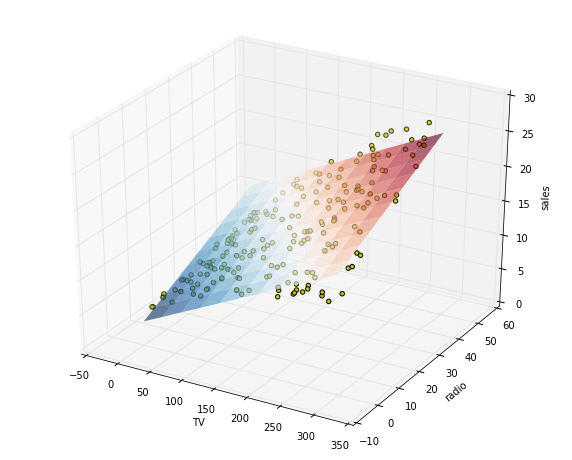

In [193]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))

X_ols = X[['TV', 'radio']]
lm = LinearRegression().fit(X_ols, y)

#ax = Axes3D(fig, azim=-110, elev=15)
ax = fig.add_subplot(111, projection='3d')

xx1, xx2 = np.meshgrid(np.linspace(min(X['TV']), max(X['TV']), 100), 
                       np.linspace(min(X['radio']), max(X['radio']), 100))

# plot the hyperplane by evaluating the parameters on the grid
z = lm.intercept_ + lm.coef_[:, 0] * xx1 + lm.coef_[:, 1] * xx2

surf = ax.plot_surface(xx1, xx2, z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

xs = df[['TV']]
ys = df[['radio']]
zs = df[['sales']]
ax.scatter(xs, ys, zs, c=color)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

From the 3D graph, we can see that the hyperplane solution doesn't perform well across the range of advertisement spendings. We can look at residual plots to get a better idea of what's going on. 

In [197]:
residuals2 = y_test - y_hat2

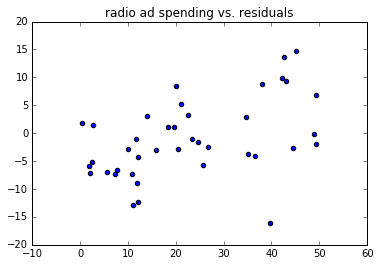

In [198]:
plt.title('radio ad spending vs. residuals')
plt.scatter(X_test['radio'], residuals2)

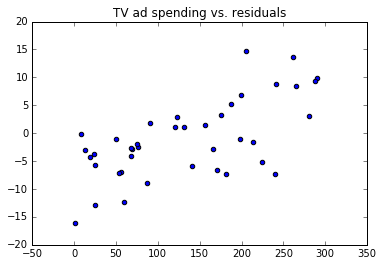

In [199]:
plt.title('TV ad spending vs. residuals')
plt.scatter(X_test['TV'], residuals2)

The residual plots tell us that the model is not good at predicting sales when advertisement spending on TV and radio is at the high end. This means that there exist a nonlinear relationship. 

Another variable we can look at that could potentially add more explanation is internet advertisement spending. Perhaps the rise in sales is due to contributions from internet advertisements and not just from TV, radio, newspapers alone. 


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


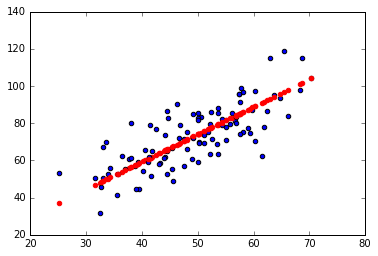

In [43]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

In [44]:
# Modifed the function given

def run2(num_iterations, alpha):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = alpha
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    error = compute_error_for_line_given_points(b, m, points)
    
    
alphas = [0.000001, 0.00001, 0.0001, 0.001]

for alpha in alphas:
    print ("With alpha = {0}".format(alpha))
    run2(100, alpha)


With alpha = 1e-06
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.011490847112648363, m = 0.5815775397751681, error = 2119.9793173686226
With alpha = 1e-05
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.02949361544713032, m = 1.4700028426067162, error = 112.84803925712856
With alpha = 0.0001
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809
With alpha = 0.001
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -3.1165582062514995e+58, m = -1.585655822608489e+60, error = 6.267874454306815e+123


Based on the output above, we can see that the error is lowest when alpha = 0.0001. The error is higher with a smaller alpha, and when alpha increases by a factor of 10 to 0.001, the error quickly rises to a very large number. 

With a smaller alpha, convergence takes longer because each gradient descent takes a smaller step. With a larger alpha, convergence might not occur because the gradient descent can overshoot the global minima each time it approaches the minima. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [40]:
def gradient_descent_runner2(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    error_history = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        error_history.append(compute_error_for_line_given_points(b, m, points))
    return error_history
    #return [b, m]

def run3(num_iterations, alpha, color):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = alpha
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    error_history = gradient_descent_runner2(points, initial_b, initial_m, learning_rate, num_iterations)
    
    fig = plt.figure()
    plt.plot(np.arange(0, 100), error_history, color)
    fig.suptitle("Training Loss with learning rate of " + str(alpha))
    plt.xlabel("Iteration #")
    plt.ylabel("Error")


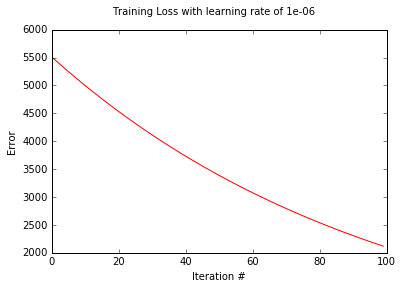

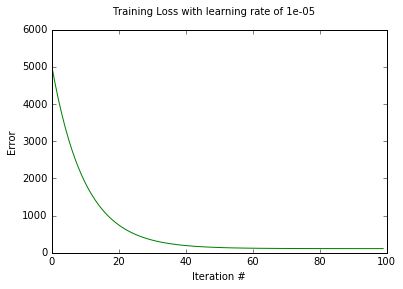

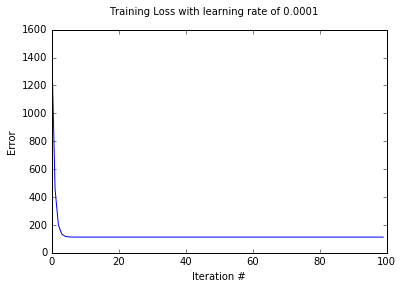

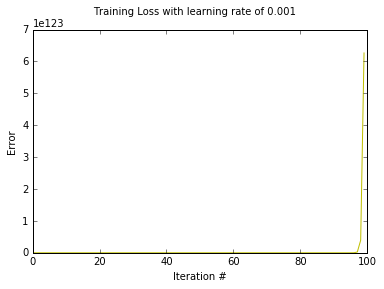

In [41]:
alphas = [0.000001, 0.00001, 0.0001, 0.001]
colors = ['r', 'g', 'b', 'y']
for alpha, color in zip(alphas, colors):
    #print ("With alpha = {0}".format(alpha))
    run3(100, alpha, color)
plt.show()


From these plots, we can see that alpha of 0.00001 achieves the minimum error at a nice rate, and the alpha of 0.0001 gets there even faster. 